## 📊 Seaborn: Guia Detalhado com Exemplos de Código

**O que é Seaborn?**

```
# Isto está formatado como código
```



Seaborn é uma biblioteca de visualização de dados Python baseada no Matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos. Seaborn visa tornar a visualização uma parte central da exploração e compreensão de dados.

**Por que usar Seaborn?**

1.  **Foco Estatístico:** Funções otimizadas para visualizar relações estatísticas, distribuições e comparações.
2.  **Estética Aprimorada:** Vem com temas e paletas de cores padrão muito mais agradáveis visualmente que o Matplotlib base, exigindo menos customização para obter gráficos bonitos.
3.  **Integração com Pandas:** Projetada para trabalhar nativamente com DataFrames do Pandas. A maioria das funções aceita um DataFrame e os nomes das colunas como strings.
4.  **Interface de Alto Nível:** Simplifica a criação de gráficos complexos (como plots multi-painel, visualizações condicionais) com menos código comparado ao Matplotlib puro.
5.  **Complementa Matplotlib:** Seaborn não substitui Matplotlib; ele o complementa. Você ainda pode usar funções do Matplotlib para customizações finas nos gráficos gerados pelo Seaborn.

**Instalação**

Se você ainda não tem, instale via pip:
```bash
pip install seaborn pandas matplotlib
```
*(Pandas e Matplotlib são dependências essenciais)*

**Conceitos Fundamentais**

* **Baseado em Matplotlib:** Por baixo dos panos, Seaborn usa Matplotlib. Funções do Seaborn geralmente retornam objetos `Axes` do Matplotlib, permitindo customizações adicionais.
* **Dados "Tidy":** Seaborn funciona melhor com dados no formato "tidy" (arrumado), onde:
    * Cada variável forma uma coluna.
    * Cada observação forma uma linha.
    * Cada tipo de unidade observacional forma uma tabela.
    DataFrames do Pandas são ideais para isso.
* **Importação Padrão:** A convenção é importar Seaborn como `sns`.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

* **Temas e Estilos:** Seaborn facilita a aplicação de estilos visuais consistentes.

In [5]:
# Aplica um tema padrão agradável (opcional, mas recomendado)
sns.set_theme(style="darkgrid", palette="bright")

* **Funções Figure-level vs Axes-level:**
    * **Figure-level:** Funções como `relplot()`, `displot()`, `catplot()`, `lmplot()`, `pairplot()`, `jointplot`. Elas criam a figura inteira (podendo ter múltiplos subplots/Axes) e não podem ser plotadas diretamente em um `Axes` existente. Elas gerenciam a estrutura da figura.
    * **Axes-level:** Funções como `scatterplot()`, `histplot()`, `boxplot()`, `heatmap()`. Elas plotam dados em um `Axes` específico (que pode ser o `Axes` atual do `pyplot` ou um `Axes` que você passou explicitamente). São mais fáceis de compor em figuras complexas do Matplotlib.

**Datasets de Exemplo:** Seaborn vem com datasets clássicos para experimentação. Usaremos `sns.load_dataset('nome_dataset')`.

---

### Seção 1: Visualizando Relações Estatísticas (`relplot`, `scatterplot`, `lineplot`)

Como as variáveis se relacionam entre si.

**1.1 `scatterplot()` (Axes-level) / `relplot(kind='scatter')` (Figure-level)**

Mostra a relação entre duas variáveis numéricas. Permite mapear outras variáveis para cor (`hue`), tamanho (`size`) e estilo (`style`) dos pontos.

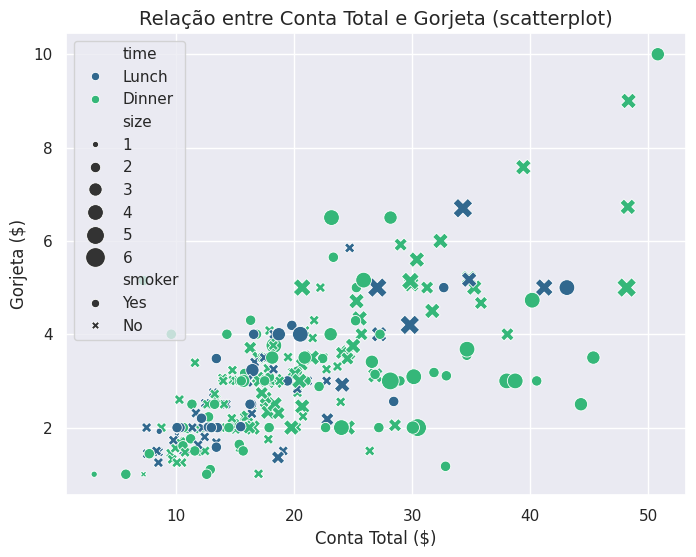

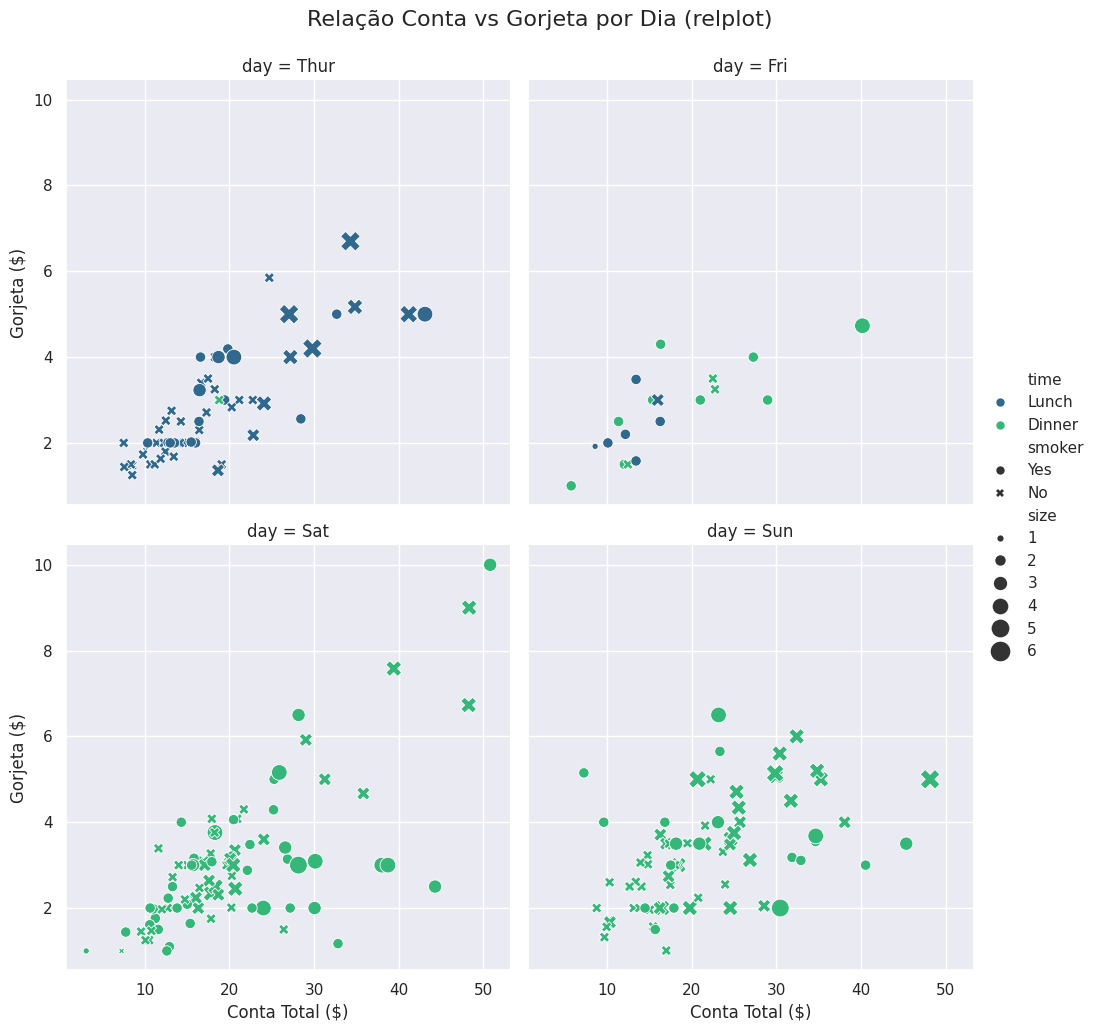

In [6]:
# --- Bloco: Scatter Plot ---
# Carregar dataset 'tips' (gorjetas em um restaurante)
tips = sns.load_dataset("tips")
# print(tips.head()) # Descomente para ver as primeiras linhas

# 1. Usando scatterplot (Axes-level)
plt.figure(figsize=(8, 6)) # Cria uma figura Matplotlib
ax_scatter = sns.scatterplot(
    data=tips,          # DataFrame
    x="total_bill",     # Coluna para o eixo X
    y="tip",            # Coluna para o eixo Y
    hue="time",         # Coluna para mapear cores (Almoço/Jantar)
    size="size",        # Coluna para mapear tamanho dos pontos (número de pessoas)
    style="smoker",       # Coluna para mapear estilo dos marcadores (Fumante/Não Fumante)
    palette="viridis",  # Paleta de cores para 'hue'
    sizes=(20, 200)     # Intervalo de tamanhos para 'size'
)
ax_scatter.set_title('Relação entre Conta Total e Gorjeta (scatterplot)', fontsize=14)
ax_scatter.set_xlabel('Conta Total ($)', fontsize=12)
ax_scatter.set_ylabel('Gorjeta ($)', fontsize=12)
plt.show()

# 2. Usando relplot (Figure-level) para o mesmo plot (com faceting opcional)
# 'relplot' cria a figura e os eixos. Ótimo para faceting (múltiplos painéis).
# kind='scatter' é o padrão
rel_scatter = sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="time",
    size="size",
    style="smoker",
    palette="viridis",
    sizes=(20, 200),
    col="day",          # Cria colunas separadas para cada dia da semana
    col_wrap=2          # Quebra as colunas a cada 2 painéis
    # row="sex"         # Poderia adicionar linhas para 'sexo' também
)
rel_scatter.fig.suptitle('Relação Conta vs Gorjeta por Dia (relplot)', y=1.03, fontsize=16) # Título da figura
rel_scatter.set_axis_labels("Conta Total ($)", "Gorjeta ($)") # Rótulos para todos os subplots
plt.show()

# Esperado:
# 1. Um scatter plot mostrando gorjeta vs conta total. Pontos coloridos por 'time',
#    tamanho por 'size' (pessoas na mesa), e estilo por 'smoker'.
# 2. Uma figura com múltiplos painéis (um para cada dia), cada um mostrando o mesmo
#    tipo de scatter plot do exemplo 1, facilitando a comparação entre os dias.
# --- Fim Bloco: Scatter Plot ---

**1.2 `lineplot()` (Axes-level) / `relplot(kind='line')` (Figure-level)**

Mostra a tendência de uma variável numérica ao longo de outra (geralmente tempo ou uma sequência ordenada). Por padrão, agrega múltiplos valores de Y para um mesmo X (mostrando média e intervalo de confiança).

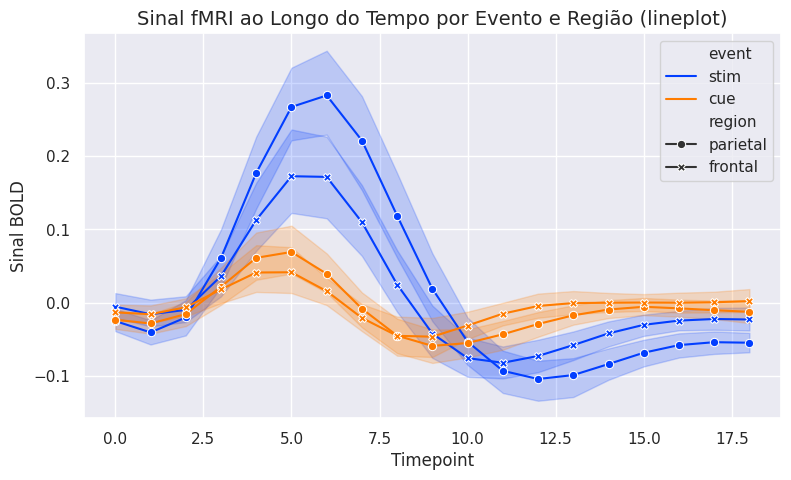

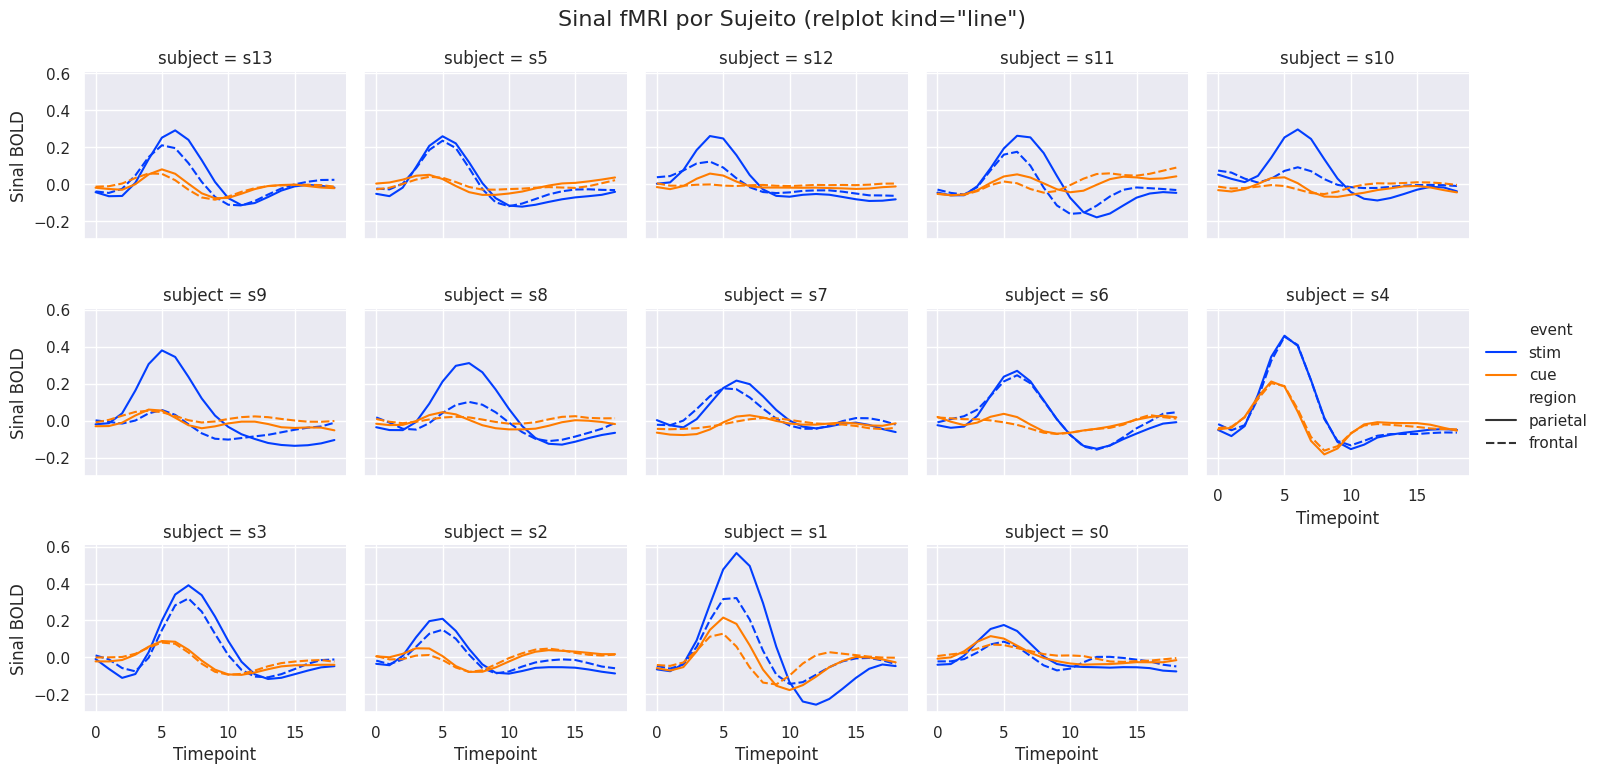

In [7]:
# --- Bloco: Line Plot ---
# Carregar dataset 'fmri' (sinal cerebral ao longo do tempo)
fmri = sns.load_dataset("fmri")
# print(fmri.head())

# 1. Usando lineplot (Axes-level)
plt.figure(figsize=(9, 5))
ax_line = sns.lineplot(
    data=fmri,
    x="timepoint",      # Eixo X (tempo)
    y="signal",         # Eixo Y (sinal)
    hue="event",        # Linhas separadas por cor para cada 'event'
    style="region",       # Estilos de linha separados para cada 'region'
    markers=True,       # Adiciona marcadores aos pontos
    dashes=False,       # Usa apenas estilos sólidos/pontilhados, não traços complexos
    errorbar=('ci', 95) # Mostra intervalo de confiança de 95% (padrão)
                        # pode ser 'sd' para desvio padrão ou None
)
ax_line.set_title('Sinal fMRI ao Longo do Tempo por Evento e Região (lineplot)', fontsize=14)
ax_line.set_xlabel('Timepoint', fontsize=12)
ax_line.set_ylabel('Sinal BOLD', fontsize=12)
plt.show()

# 2. Usando relplot com kind='line' (Figure-level)
rel_line = sns.relplot(
    data=fmri,
    x="timepoint",
    y="signal",
    hue="event",
    style="region",
    kind="line",        # Especifica que queremos um line plot
    col="subject",      # Colunas separadas por 'subject'
    col_wrap=5,         # Quebra a cada 5 colunas
    height=2.5,         # Altura de cada painel
    aspect=1.2          # Proporção largura/altura de cada painel
)
rel_line.fig.suptitle('Sinal fMRI por Sujeito (relplot kind="line")', y=1.03, fontsize=16)
rel_line.set_axis_labels("Timepoint", "Sinal BOLD")
plt.show()

# Esperado:
# 1. Um gráfico de linhas mostrando a evolução média do sinal fMRI ao longo do tempo.
#    Linhas separadas por cor ('event') e estilo ('region'), com sombras indicando o IC 95%.
# 2. Uma grade de gráficos de linha, um para cada 'subject', mostrando as mesmas tendências.
# --- Fim Bloco: Line Plot ---

---

### Seção 2: Visualizando Distribuições (`displot`, `histplot`, `kdeplot`, `ecdfplot`, `rugplot`)

Como os dados estão distribuídos.

**2.1 `histplot()` (Axes-level) / `displot(kind='hist')` (Figure-level)**

Cria um histograma para visualizar a distribuição de uma única variável (univariada) ou a relação de distribuição entre duas variáveis (bivariada).

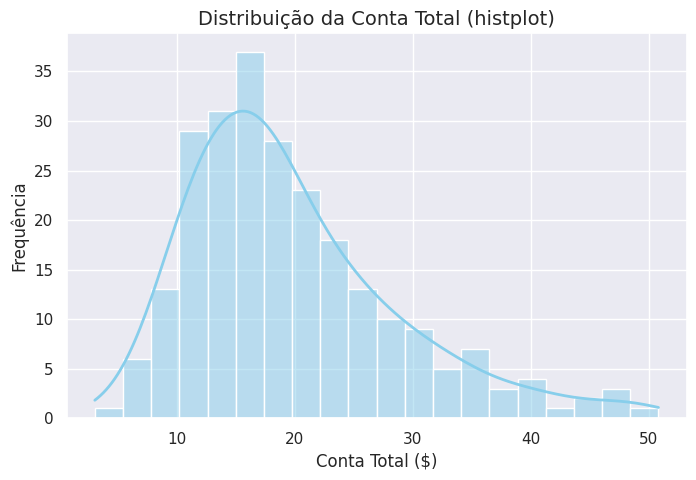

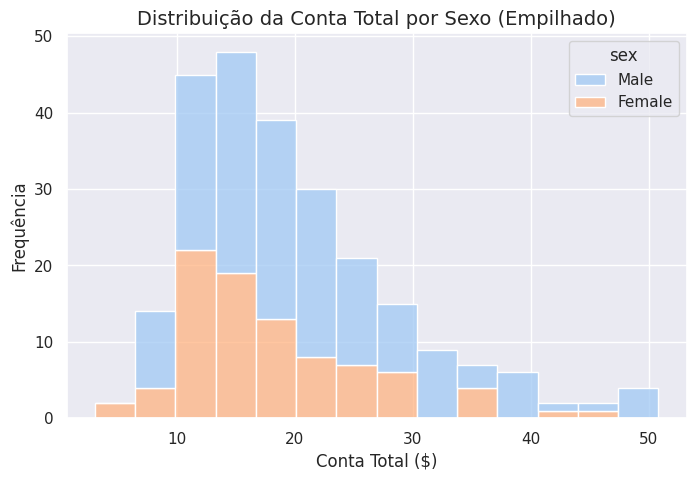

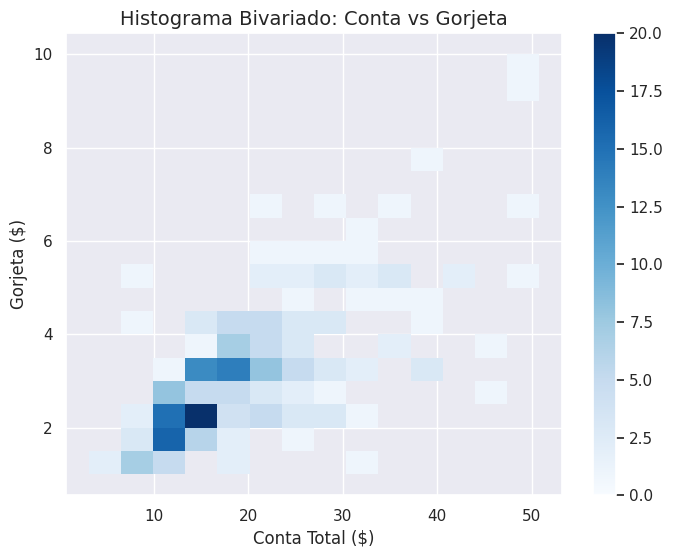

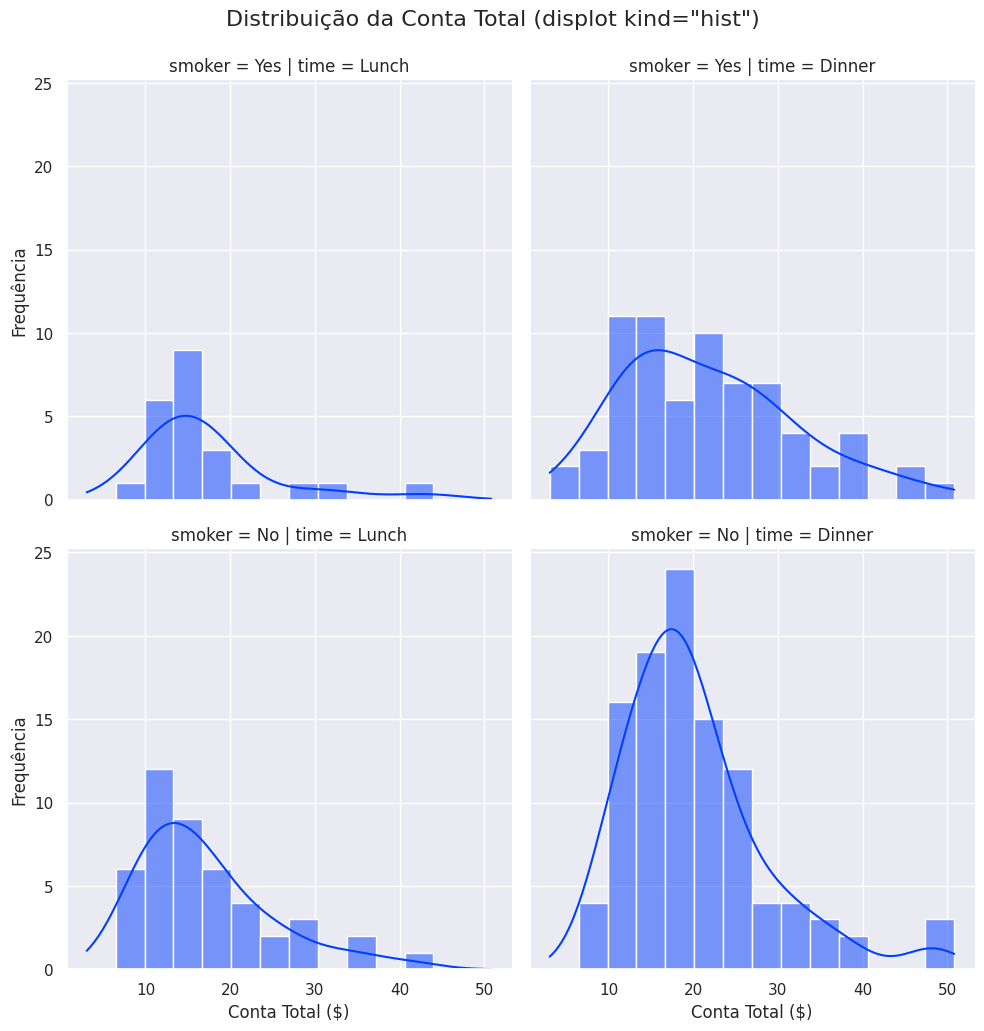

In [8]:
# --- Bloco: Histogram Plot ---
# Reutilizar dataset 'tips'
tips = sns.load_dataset("tips")

# 1. Histograma Univariado (histplot)
plt.figure(figsize=(8, 5))
ax_hist = sns.histplot(
    data=tips,
    x="total_bill",     # Variável a ser distribuída
    bins=20,            # Número de barras (ou limites específicos)
    kde=True,           # Sobrepõe uma estimativa de densidade de kernel (KDE)
    color='skyblue',
    line_kws={'linewidth': 2, 'color': 'red'} # Argumentos para a linha KDE
)
ax_hist.set_title('Distribuição da Conta Total (histplot)', fontsize=14)
ax_hist.set_xlabel('Conta Total ($)', fontsize=12)
ax_hist.set_ylabel('Frequência', fontsize=12)
plt.show()

# 2. Histograma Univariado com separação por 'hue' (histplot)
plt.figure(figsize=(8, 5))
sns.histplot(data=tips, x="total_bill", hue="sex", multiple="stack", palette="pastel") # 'stack', 'dodge', 'layer', 'fill'
plt.title('Distribuição da Conta Total por Sexo (Empilhado)', fontsize=14)
plt.xlabel('Conta Total ($)', fontsize=12); plt.ylabel('Frequência', fontsize=12)
plt.show()

# 3. Histograma Bivariado (histplot) - mostra contagem em bins 2D
plt.figure(figsize=(8, 6))
sns.histplot(data=tips, x="total_bill", y="tip", cmap="Blues", cbar=True) # cbar=True adiciona barra de cores
plt.title('Histograma Bivariado: Conta vs Gorjeta', fontsize=14)
plt.xlabel('Conta Total ($)', fontsize=12); plt.ylabel('Gorjeta ($)', fontsize=12)
plt.show()

# 4. Usando displot (Figure-level) para histograma com faceting
disp_hist = sns.displot(
    data=tips,
    x="total_bill",
    col="time",         # Colunas para Almoço/Jantar
    row="smoker",       # Linhas para Fumante/Não Fumante
    kde=True,
    kind="hist"         # Especifica histograma
)
disp_hist.fig.suptitle('Distribuição da Conta Total (displot kind="hist")', y=1.03, fontsize=16)
disp_hist.set_axis_labels("Conta Total ($)", "Frequência")
plt.show()

# Esperado:
# 1. Histograma da conta total com curva KDE sobreposta.
# 2. Histograma da conta total com barras empilhadas por sexo.
# 3. Histograma 2D mostrando a densidade de pontos (conta, gorjeta) em bins retangulares.
# 4. Grade 2x2 de histogramas da conta total, separados por 'time' e 'smoker'.
# --- Fim Bloco: Histogram Plot ---

**2.2 `kdeplot()` (Axes-level) / `displot(kind='kde')` (Figure-level)**

Estima e plota a função de densidade de probabilidade (Kernel Density Estimate - KDE), útil para visualizar a forma da distribuição de forma suavizada. Pode ser univariado ou bivariado.

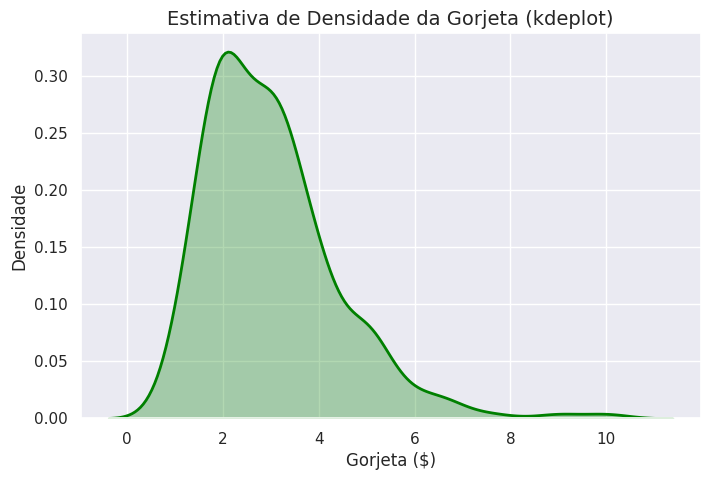

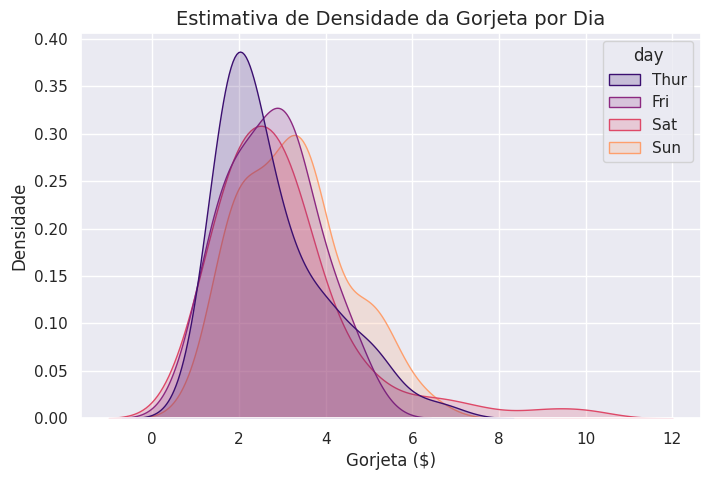

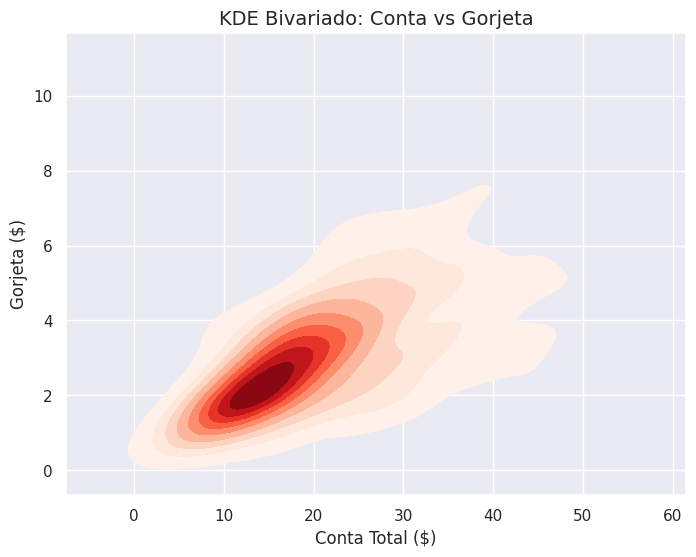

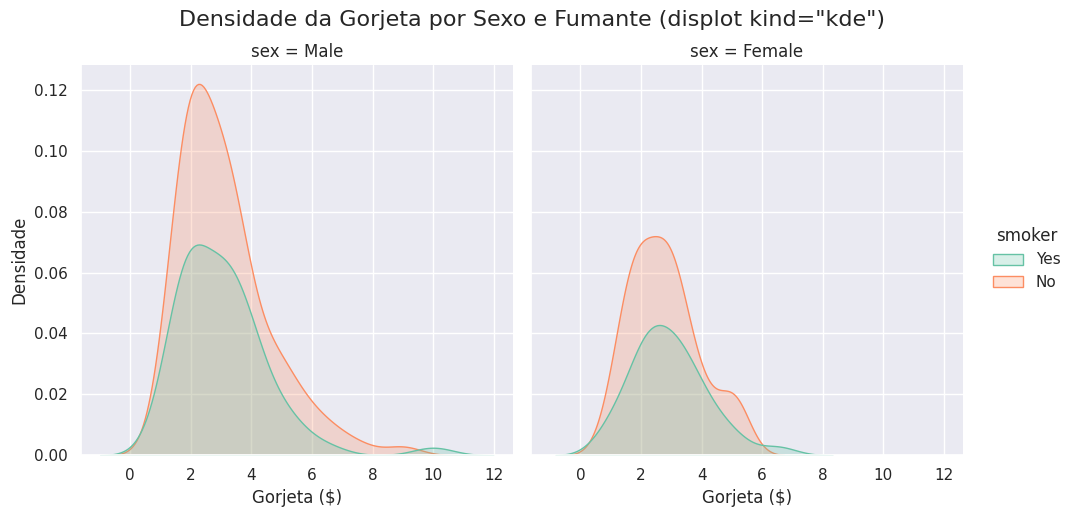

In [9]:
# --- Bloco: KDE Plot ---
# Reutilizar dataset 'tips'

# 1. KDE Univariado (kdeplot)
plt.figure(figsize=(8, 5))
sns.kdeplot(data=tips, x="tip", color='green', fill=True, alpha=0.3, linewidth=2) # fill=True preenche a área sob a curva
plt.title('Estimativa de Densidade da Gorjeta (kdeplot)', fontsize=14)
plt.xlabel('Gorjeta ($)', fontsize=12); plt.ylabel('Densidade', fontsize=12)
plt.show()

# 2. KDE Univariado com 'hue' (kdeplot)
plt.figure(figsize=(8, 5))
sns.kdeplot(data=tips, x="tip", hue="day", fill=True, alpha=0.2, palette="magma", common_norm=False) # common_norm=False: cada curva é normalizada independentemente
plt.title('Estimativa de Densidade da Gorjeta por Dia', fontsize=14)
plt.xlabel('Gorjeta ($)', fontsize=12); plt.ylabel('Densidade', fontsize=12)
plt.show()

# 3. KDE Bivariado (kdeplot) - mostra contornos de densidade
plt.figure(figsize=(8, 6))
sns.kdeplot(data=tips, x="total_bill", y="tip", cmap="Reds", fill=True, thresh=0.05) # thresh: nível mínimo de densidade para desenhar
plt.title('KDE Bivariado: Conta vs Gorjeta', fontsize=14)
plt.xlabel('Conta Total ($)', fontsize=12); plt.ylabel('Gorjeta ($)', fontsize=12)
plt.show()

# 4. Usando displot (Figure-level) para KDE com faceting
disp_kde = sns.displot(
    data=tips,
    x="tip",
    kind="kde",       # Especifica KDE
    col="sex",
    hue="smoker",
    fill=True,
    palette="Set2"
)
disp_kde.fig.suptitle('Densidade da Gorjeta por Sexo e Fumante (displot kind="kde")', y=1.03, fontsize=16)
disp_kde.set_axis_labels("Gorjeta ($)", "Densidade")
plt.show()

# Esperado:
# 1. Curva suavizada mostrando a distribuição da gorjeta.
# 2. Múltiplas curvas KDE (uma para cada dia) no mesmo gráfico.
# 3. Contornos de densidade mostrando onde os pares (conta, gorjeta) são mais comuns.
# 4. Grade de gráficos KDE, separados por 'sex' e com curvas coloridas por 'smoker'.
# --- Fim Bloco: KDE Plot ---

**2.3 Outros Plots de Distribuição:**

* **`ecdfplot()` / `displot(kind='ecdf')`**: Plota a Função de Distribuição Cumulativa Empírica. Mostra a proporção de dados abaixo de cada valor.
* **`rugplot()`**: Adiciona pequenas marcas verticais no eixo para mostrar a localização de cada ponto individual. Útil para complementar `histplot` ou `kdeplot`.

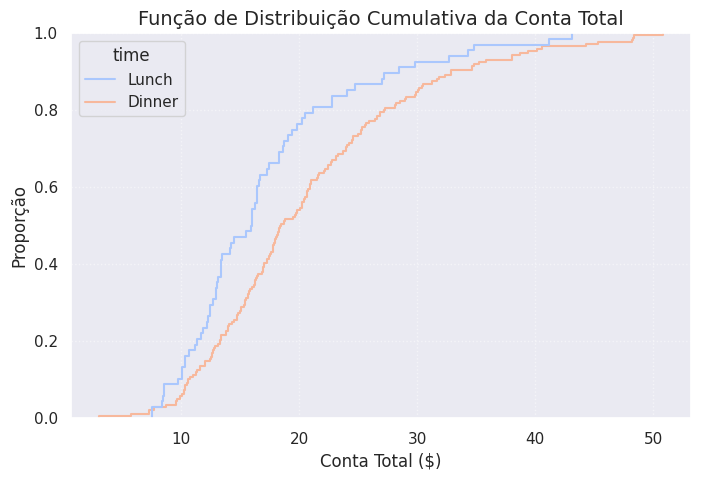

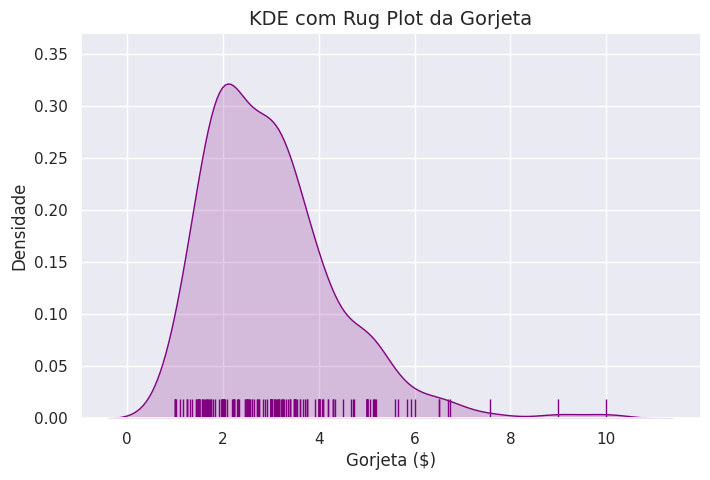

In [10]:
# --- Bloco: ECDF e Rug Plot ---
# Reutilizar dataset 'tips'

# 1. ECDF Plot (ecdfplot)
plt.figure(figsize=(8, 5))
sns.ecdfplot(data=tips, x="total_bill", hue="time", palette="coolwarm", stat="proportion") # stat='count' or 'proportion'
plt.title('Função de Distribuição Cumulativa da Conta Total', fontsize=14)
plt.xlabel('Conta Total ($)', fontsize=12); plt.ylabel('Proporção', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

# 2. Rug Plot complementando um KDE (rugplot)
plt.figure(figsize=(8, 5))
sns.kdeplot(data=tips, x="tip", color='purple', fill=True, alpha=0.2)
sns.rugplot(data=tips, x="tip", color='purple', height=0.05) # height controla o tamanho das marcas
plt.title('KDE com Rug Plot da Gorjeta', fontsize=14)
plt.xlabel('Gorjeta ($)', fontsize=12); plt.ylabel('Densidade', fontsize=12)
plt.show()

# Esperado:
# 1. Curvas em forma de "S" mostrando a proporção acumulada de contas totais, separadas por 'time'.
# 2. Um gráfico KDE da gorjeta com pequenas marcas na base indicando a posição de cada gorjeta individual.
# --- Fim Bloco: ECDF e Rug Plot ---

---

### Seção 3: Visualizando Dados Categóricos (`catplot`, `boxplot`, `violinplot`, `barplot`, etc.)

Comparando distribuições ou estimativas entre diferentes categorias. Seaborn brilha aqui! `catplot()` é a interface Figure-level unificada.

**3.1 Plots de Dispersão Categóricos (`stripplot`, `swarmplot` / `catplot(kind=...)`)**

Mostram a distribuição de pontos para cada categoria.

<ipython-input-11-6f0ff7fc4563>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=iris, x="species", y="petal_length", jitter=True, palette="Set1") # jitter adiciona ruído horizontal para evitar sobreposição total


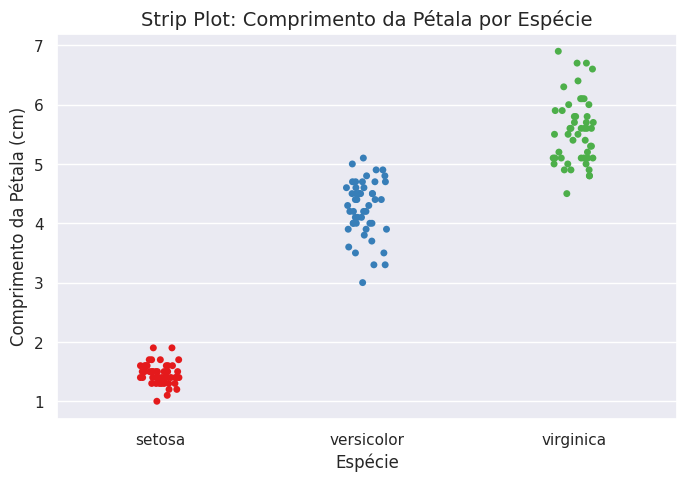

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


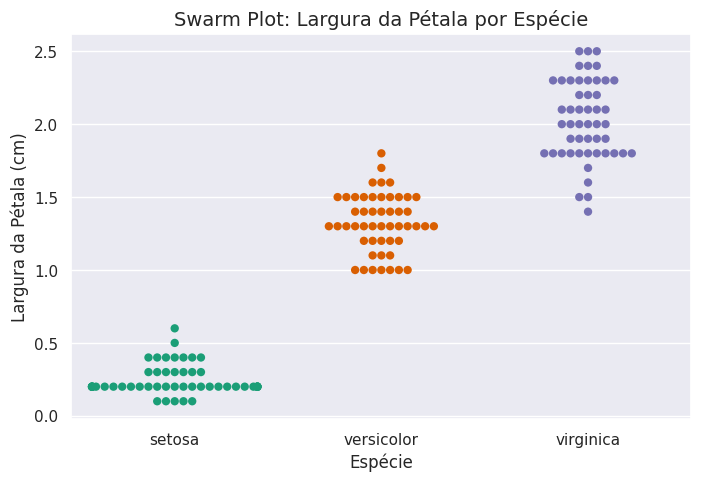

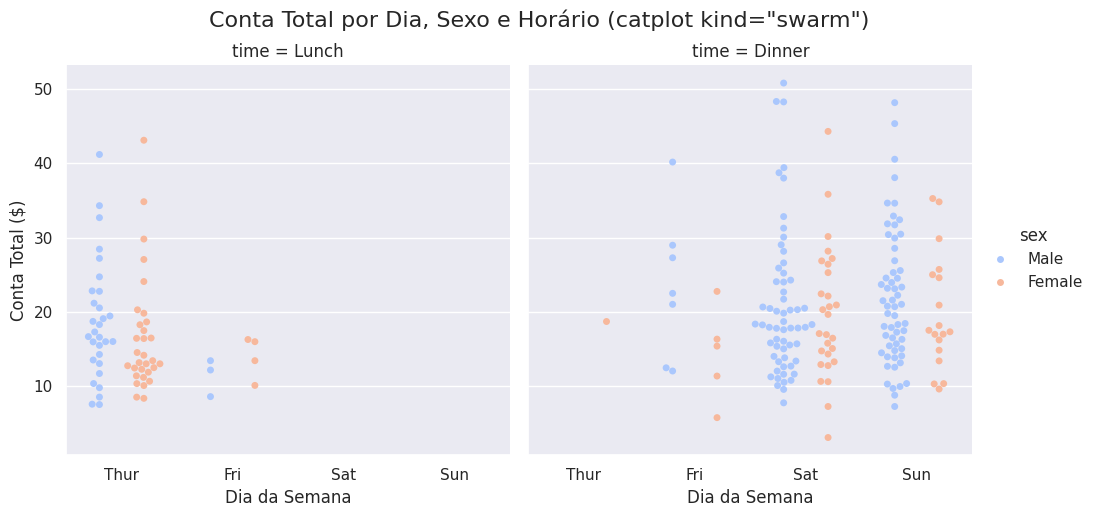

In [11]:
# --- Bloco: Scatter Categórico ---
# Dataset 'iris'
iris = sns.load_dataset("iris")

# 1. Strip Plot (stripplot) - pontos podem se sobrepor
plt.figure(figsize=(8, 5))
sns.stripplot(data=iris, x="species", y="petal_length", jitter=True, palette="Set1") # jitter adiciona ruído horizontal para evitar sobreposição total
plt.title('Strip Plot: Comprimento da Pétala por Espécie', fontsize=14)
plt.xlabel('Espécie', fontsize=12); plt.ylabel('Comprimento da Pétala (cm)', fontsize=12)
plt.show()

# 2. Swarm Plot (swarmplot) - ajusta pontos para evitar sobreposição (melhor para datasets menores)
plt.figure(figsize=(8, 5))
sns.swarmplot(data=iris, x="species", y="petal_width", hue="species", palette="Dark2", size=6, legend=False) # 'hue' aqui apenas para colorir igual ao eixo X
plt.title('Swarm Plot: Largura da Pétala por Espécie', fontsize=14)
plt.xlabel('Espécie', fontsize=12); plt.ylabel('Largura da Pétala (cm)', fontsize=12)
plt.show()

# 3. Usando catplot (Figure-level) para swarm com faceting
cat_swarm = sns.catplot(
    data=tips,
    x="day",
    y="total_bill",
    kind="swarm",    # Especifica swarm plot
    hue="sex",
    col="time",      # Colunas por Almoço/Jantar
    palette="coolwarm",
    dodge=True       # Separa os pontos por 'hue' horizontalmente
)
cat_swarm.fig.suptitle('Conta Total por Dia, Sexo e Horário (catplot kind="swarm")', y=1.03, fontsize=16)
cat_swarm.set_axis_labels("Dia da Semana", "Conta Total ($)")
plt.show()

# Esperado:
# 1. Pontos mostrando o comprimento da pétala para cada espécie, com algum jitter.
# 2. Pontos mostrando a largura da pétala, arranjados para não se sobreporem, coloridos por espécie.
# 3. Grade de swarm plots mostrando a conta total, separados por dia, sexo e horário.
# --- Fim Bloco: Scatter Categórico ---

**3.2 Plots de Distribuição Categóricos (`boxplot`, `violinplot`, `boxenplot` / `catplot(kind=...)`)**

Resumem a distribuição dentro de cada categoria.

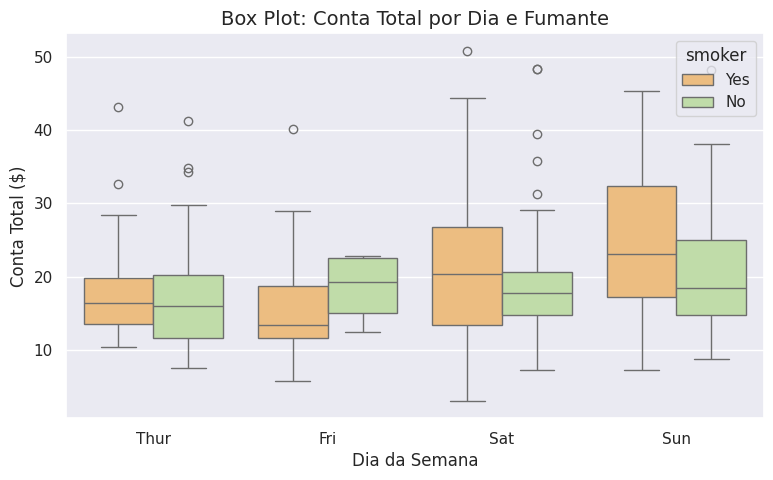

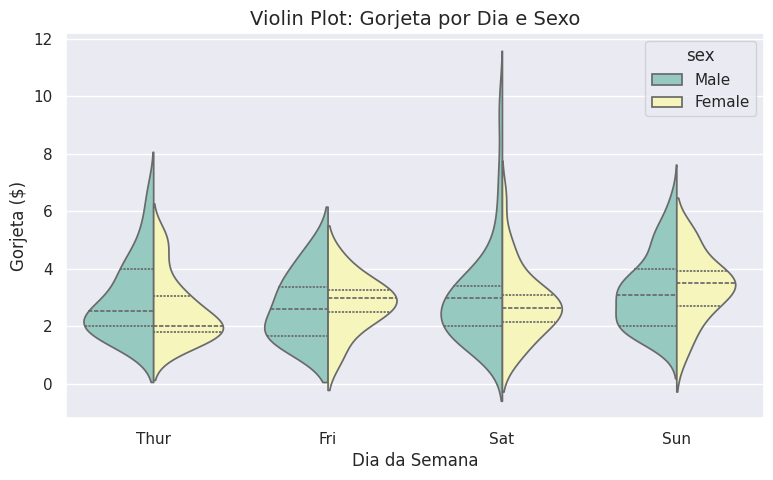

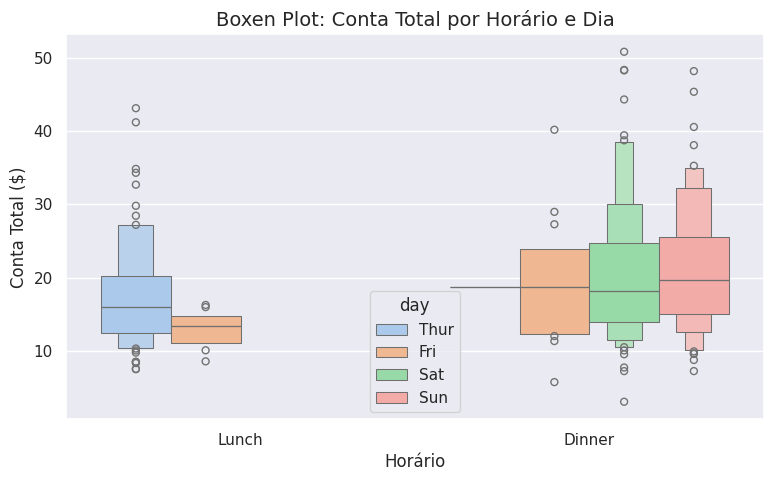

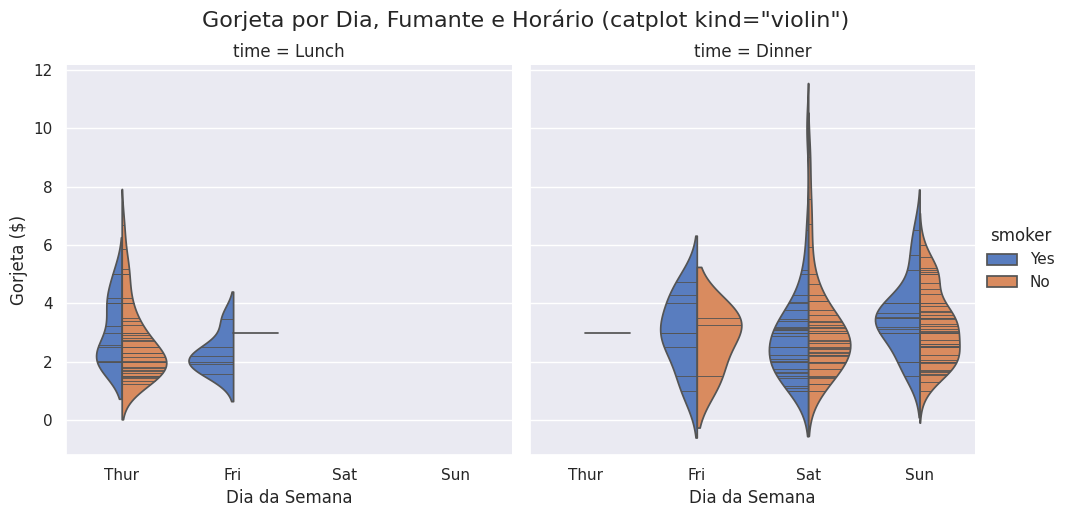

In [12]:
# --- Bloco: Distribuição Categórica ---
# Reutilizar dataset 'tips'

# 1. Box Plot (boxplot) - resumo com quartis e outliers
plt.figure(figsize=(9, 5))
sns.boxplot(data=tips, x="day", y="total_bill", hue="smoker", palette="Spectral")
plt.title('Box Plot: Conta Total por Dia e Fumante', fontsize=14)
plt.xlabel('Dia da Semana', fontsize=12); plt.ylabel('Conta Total ($)', fontsize=12)
plt.show()

# 2. Violin Plot (violinplot) - combina boxplot com KDE (mostra forma da distribuição)
plt.figure(figsize=(9, 5))
sns.violinplot(data=tips, x="day", y="tip", hue="sex", split=True, inner="quart", palette="Set3")
# split=True: mostra cada sexo em metade de um violino
# inner='quart': desenha linhas para os quartis dentro do violino ('box', 'stick', 'point', None)
plt.title('Violin Plot: Gorjeta por Dia e Sexo', fontsize=14)
plt.xlabel('Dia da Semana', fontsize=12); plt.ylabel('Gorjeta ($)', fontsize=12)
plt.show()

# 3. Boxen Plot (boxenplot) - similar ao boxplot, mas com mais quantis (bom para datasets maiores)
plt.figure(figsize=(9, 5))
sns.boxenplot(data=tips, x="time", y="total_bill", hue="day", palette="pastel")
plt.title('Boxen Plot: Conta Total por Horário e Dia', fontsize=14)
plt.xlabel('Horário', fontsize=12); plt.ylabel('Conta Total ($)', fontsize=12)
plt.show()

# 4. Usando catplot (Figure-level) para violin com faceting
cat_violin = sns.catplot(
    data=tips,
    x="day", y="tip",
    kind="violin",    # Especifica violin plot
    hue="smoker",
    col="time",
    split=True,
    inner="stick",
    palette="muted"
)
cat_violin.fig.suptitle('Gorjeta por Dia, Fumante e Horário (catplot kind="violin")', y=1.03, fontsize=16)
cat_violin.set_axis_labels("Dia da Semana", "Gorjeta ($)")
plt.show()


# Esperado:
# 1. Boxplots mostrando a distribuição da conta total para cada dia, com caixas separadas para fumantes/não fumantes.
# 2. Violin plots mostrando a distribuição da gorjeta para cada dia, com violinos divididos por sexo.
# 3. Boxen plots (mais detalhados que boxplots) mostrando a conta total por horário, separados por dia.
# 4. Grade de violin plots mostrando a gorjeta, separados por dia, fumante e horário.
# --- Fim Bloco: Distribuição Categórica ---

**3.3 Plots de Estimativa Categóricos (`barplot`, `pointplot`, `countplot` / `catplot(kind=...)`)**

Mostram uma estimativa de tendência central (média, contagem) para cada categoria.

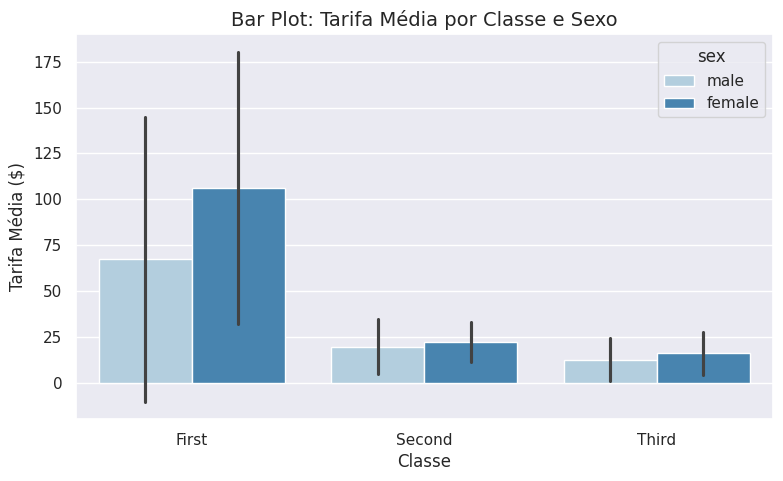

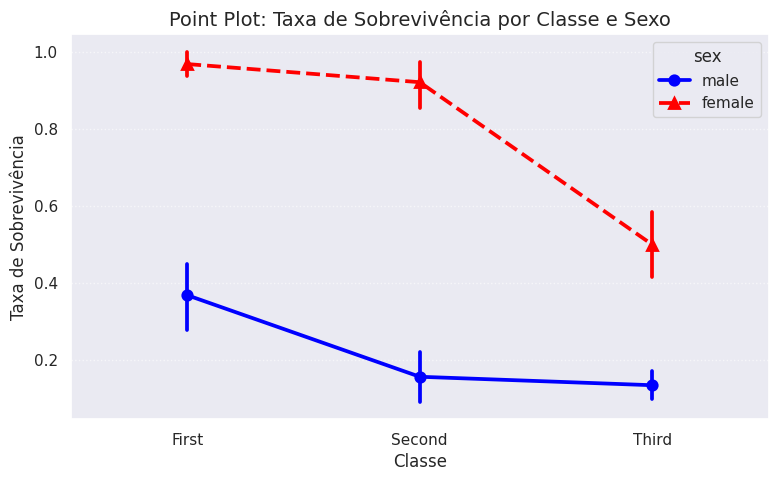

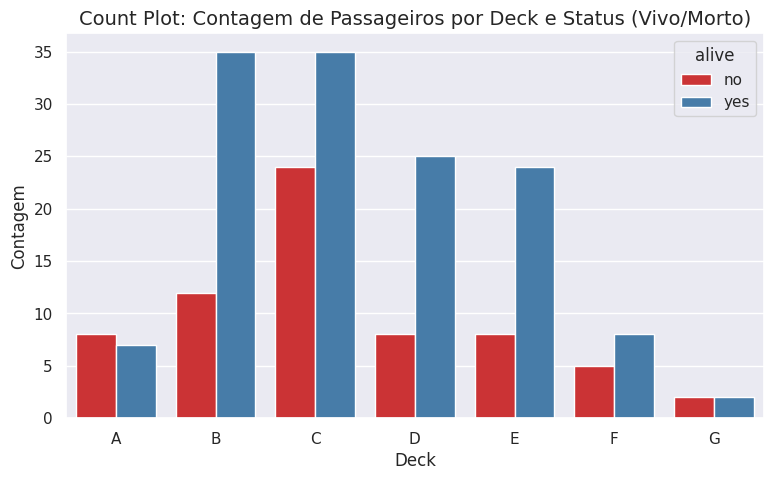

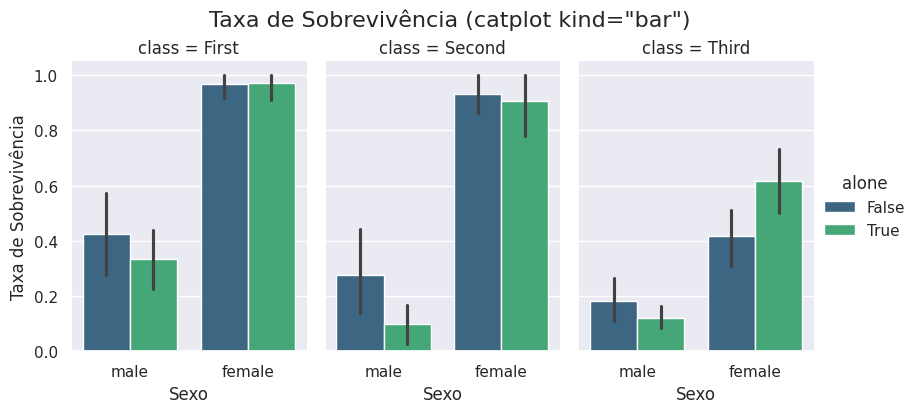

In [13]:
# --- Bloco: Estimativa Categórica ---
# Dataset 'titanic'
titanic = sns.load_dataset("titanic")

# 1. Bar Plot (barplot) - mostra média (padrão) e intervalo de confiança
plt.figure(figsize=(9, 5))
sns.barplot(data=titanic, x="class", y="fare", hue="sex", palette="Blues", errorbar="sd") # errorbar='sd' (desvio padrão), 'ci' (IC 95%), None
plt.title('Bar Plot: Tarifa Média por Classe e Sexo', fontsize=14)
plt.xlabel('Classe', fontsize=12); plt.ylabel('Tarifa Média ($)', fontsize=12)
plt.show()

# 2. Point Plot (pointplot) - mostra média (padrão) e IC, conectando pontos da mesma 'hue'. Bom para ver interações.
plt.figure(figsize=(9, 5))
sns.pointplot(data=titanic, x="class", y="survived", hue="sex", palette={'male': 'blue', 'female': 'red'}, markers=["o", "^"], linestyles=["-", "--"])
# Mostra a taxa de sobrevivência (média de 'survived' que é 0 ou 1)
plt.title('Point Plot: Taxa de Sobrevivência por Classe e Sexo', fontsize=14)
plt.xlabel('Classe', fontsize=12); plt.ylabel('Taxa de Sobrevivência', fontsize=12)
plt.grid(True, axis='y', linestyle=':', alpha=0.6)
plt.show()

# 3. Count Plot (countplot) - mostra a contagem de observações em cada categoria (essencialmente um histograma categórico)
plt.figure(figsize=(9, 5))
sns.countplot(data=titanic, x="deck", hue="alive", palette="Set1", order=sorted(titanic['deck'].dropna().unique())) # order define a ordem das barras X
plt.title('Count Plot: Contagem de Passageiros por Deck e Status (Vivo/Morto)', fontsize=14)
plt.xlabel('Deck', fontsize=12); plt.ylabel('Contagem', fontsize=12)
plt.show()

# 4. Usando catplot (Figure-level) para barplot com faceting
cat_bar = sns.catplot(
    data=titanic,
    x="sex", y="survived",
    kind="bar",       # Especifica bar plot (mostra taxa de sobrevivência aqui)
    col="class",
    hue="alone",      # Estava sozinho ou não
    palette="viridis",
    height=4, aspect=0.7
)
cat_bar.fig.suptitle('Taxa de Sobrevivência (catplot kind="bar")', y=1.03, fontsize=16)
cat_bar.set_axis_labels("Sexo", "Taxa de Sobrevivência")
plt.show()

# Esperado:
# 1. Gráfico de barras mostrando a tarifa média paga por passageiros de cada classe, separado por sexo. Barras de erro indicam desvio padrão.
# 2. Gráfico de pontos mostrando a taxa de sobrevivência por classe, com linhas conectando pontos para cada sexo. Útil para ver se o efeito da classe na sobrevivência difere por sexo.
# 3. Gráfico de barras mostrando quantas pessoas estavam em cada deck, com barras separadas para vivos/mortos.
# 4. Grade de gráficos de barra mostrando a taxa de sobrevivência, separados por sexo, classe e se estava sozinho.
# --- Fim Bloco: Estimativa Categórica ---

---

### Seção 4: Visualizando Regressão Linear (`regplot`, `lmplot`)

Mostra a relação entre duas variáveis e ajusta/visualiza um modelo de regressão linear.

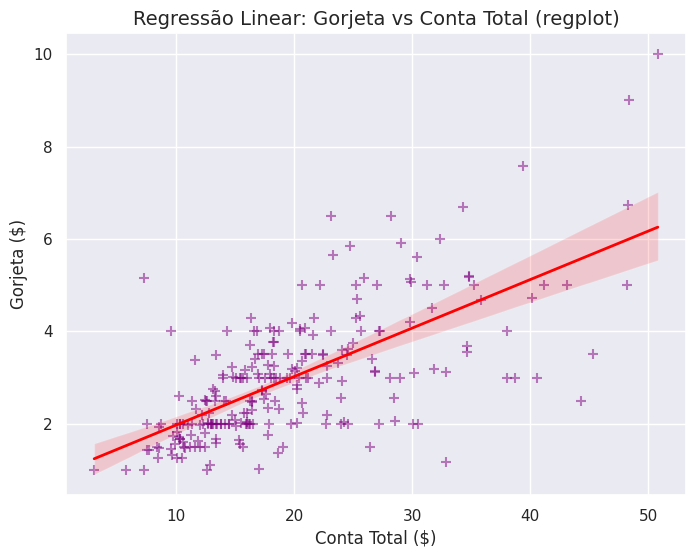

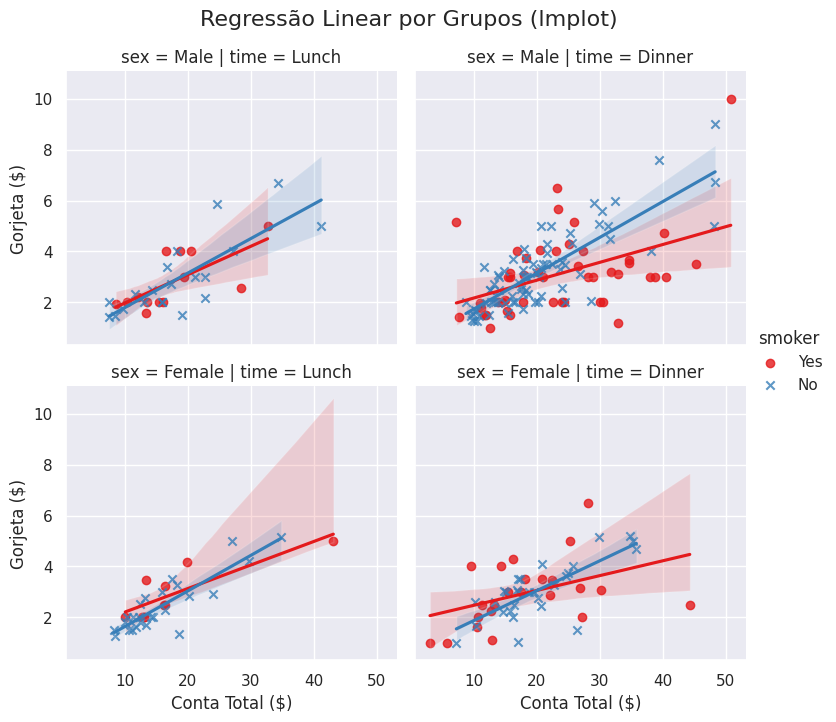

In [14]:
# --- Bloco: Regressão Linear ---
# Reutilizar dataset 'tips'

# 1. Regplot (Axes-level) - scatter plot com linha de regressão e IC
plt.figure(figsize=(8, 6))
sns.regplot(data=tips, x="total_bill", y="tip",
            marker='+', color='purple',
            line_kws={'color':'red', 'linewidth':2}, # Argumentos para a linha
            scatter_kws={'s':50, 'alpha':0.5})      # Argumentos para os pontos
plt.title('Regressão Linear: Gorjeta vs Conta Total (regplot)', fontsize=14)
plt.xlabel('Conta Total ($)', fontsize=12); plt.ylabel('Gorjeta ($)', fontsize=12)
plt.show()

# 2. Lmplot (Figure-level) - mais poderoso, permite 'hue', 'col', 'row' e diferentes modelos
lm_plot = sns.lmplot(
    data=tips, x="total_bill", y="tip",
    hue="smoker",       # Linhas de regressão separadas por cor para fumante/não fumante
    col="time",         # Colunas separadas por Almoço/Jantar
    row="sex",          # Linhas separadas por sexo
    markers=["o", "x"],
    palette="Set1",
    height=3.5,
    aspect=1.1,
    # fit_reg=False    # Desativaria a linha de regressão, mostrando só o scatter facetado
    # order=2          # Ajustaria um modelo polinomial de grau 2
    # logistic=True    # Ajustaria regressão logística (se y for binário)
)
lm_plot.fig.suptitle('Regressão Linear por Grupos (lmplot)', y=1.03, fontsize=16)
lm_plot.set_axis_labels("Conta Total ($)", "Gorjeta ($)")
plt.show()

# Esperado:
# 1. Scatter plot da gorjeta vs conta total, com uma linha de regressão linear vermelha e a sombra do intervalo de confiança.
# 2. Uma grade 2x2 de scatter plots com linhas de regressão, mostrando como a relação gorjeta/conta muda dependendo se a pessoa fuma, o sexo e o horário.
# --- Fim Bloco: Regressão Linear ---

---

### Seção 5: Visualizando Matrizes (`heatmap`, `clustermap`)

Visualiza dados em formato de matriz (2D), geralmente usando cor para representar valores.

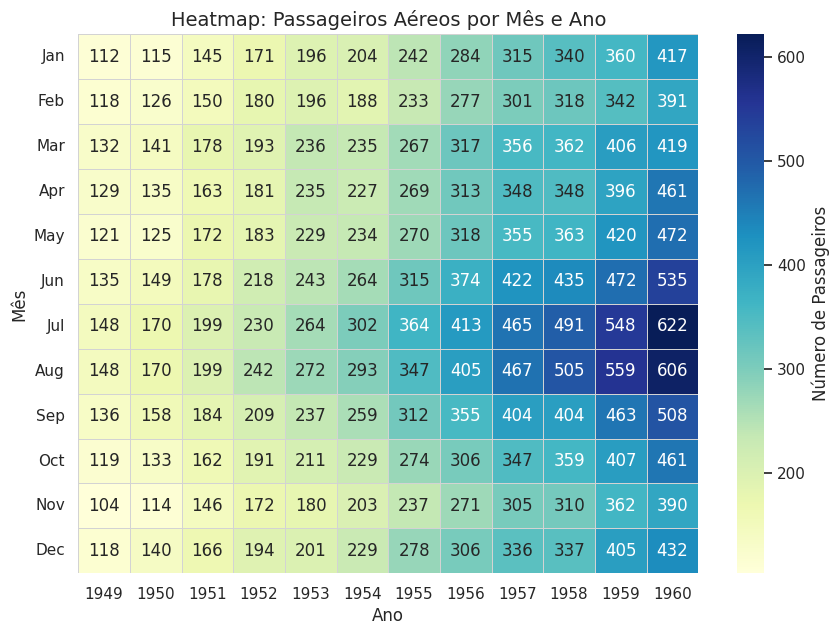

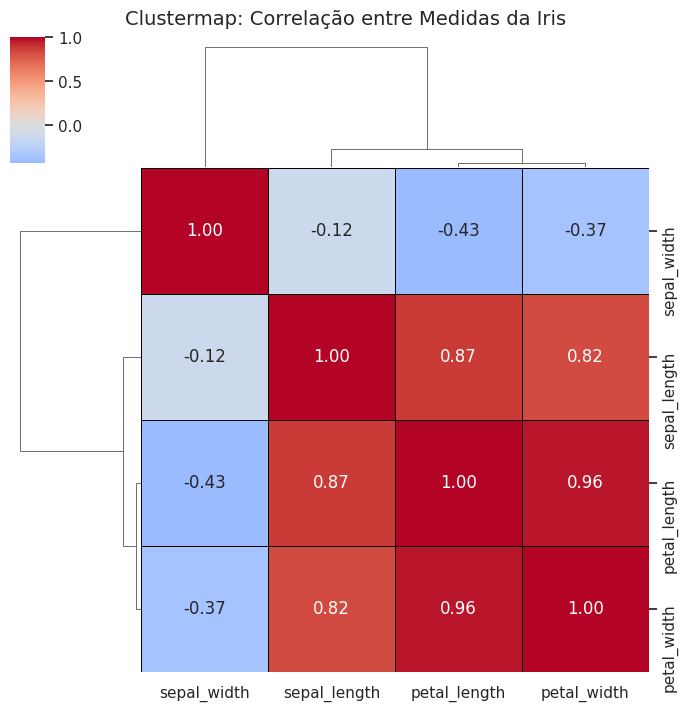

In [15]:
# --- Bloco: Matrix Plots ---

# 1. Heatmap - visualiza uma matriz numérica usando intensidade de cor
# Carregar dataset 'flights' (número de passageiros aéreos por mês/ano)
flights = sns.load_dataset("flights")
# Pivotar para formato de matriz: meses nas linhas, anos nas colunas
flights_pivot = flights.pivot(index="month", columns="year", values="passengers")
# print(flights_pivot)

plt.figure(figsize=(10, 7))
sns.heatmap(
    data=flights_pivot,
    cmap="YlGnBu",      # Colormap
    annot=True,         # Mostra os valores numéricos nas células
    fmt="d",            # Formato dos números (d=inteiro)
    linewidths=0.5,     # Linhas separando as células
    linecolor='lightgray',
    cbar_kws={'label': 'Número de Passageiros'} # Rótulo da barra de cores
)
plt.title('Heatmap: Passageiros Aéreos por Mês e Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12); plt.ylabel('Mês', fontsize=12)
plt.yticks(rotation=0) # Mantém rótulos Y na horizontal
plt.show()

# 2. Clustermap - heatmap com agrupamento hierárquico (dendrogramas)
# Reordenar linhas/colunas para agrupar similares
# Calcular correlação entre colunas do dataset 'iris'
iris = sns.load_dataset("iris")
# Selecionar apenas colunas numéricas
iris_numeric = iris.drop(columns='species')
iris_corr = iris_numeric.corr() # Calcula a matriz de correlação

cluster_map = sns.clustermap(
    data=iris_corr,
    cmap="coolwarm",    # Colormap divergente é bom para correlação (-1 a 1)
    annot=True,
    fmt=".2f",          # Formato float com 2 casas decimais
    figsize=(7, 7),
    linewidths=0.5,
    linecolor='black',
    center=0            # Centraliza o colormap em 0 para correlação
)
cluster_map.fig.suptitle('Clustermap: Correlação entre Medidas da Iris', y=1.02, fontsize=14)
plt.show()


# Esperado:
# 1. Um mapa de calor mostrando o número de passageiros. Cores mais escuras indicam mais passageiros.
#    Valores numéricos exibidos em cada célula. Mostra claramente o padrão sazonal e o crescimento anual.
# 2. Um mapa de calor da matriz de correlação das medidas da Iris. As linhas e colunas são reordenadas
#    com base na similaridade, e dendrogramas mostram a hierarquia do agrupamento.
# --- Fim Bloco: Matrix Plots ---

---

### Seção 6: Grades Multi-Plot (`FacetGrid`, `PairGrid`, `jointplot`, `pairplot`)

Cria figuras com múltiplos subplots organizados em uma grade, mapeando variáveis para linhas, colunas e cores/estilos dos plots.

**6.1 `pairplot()`**

Plota relações par-a-par (scatter plots) e distribuições univariadas (histograma ou KDE na diagonal) para múltiplas variáveis em um DataFrame. Ótimo para análise exploratória rápida.

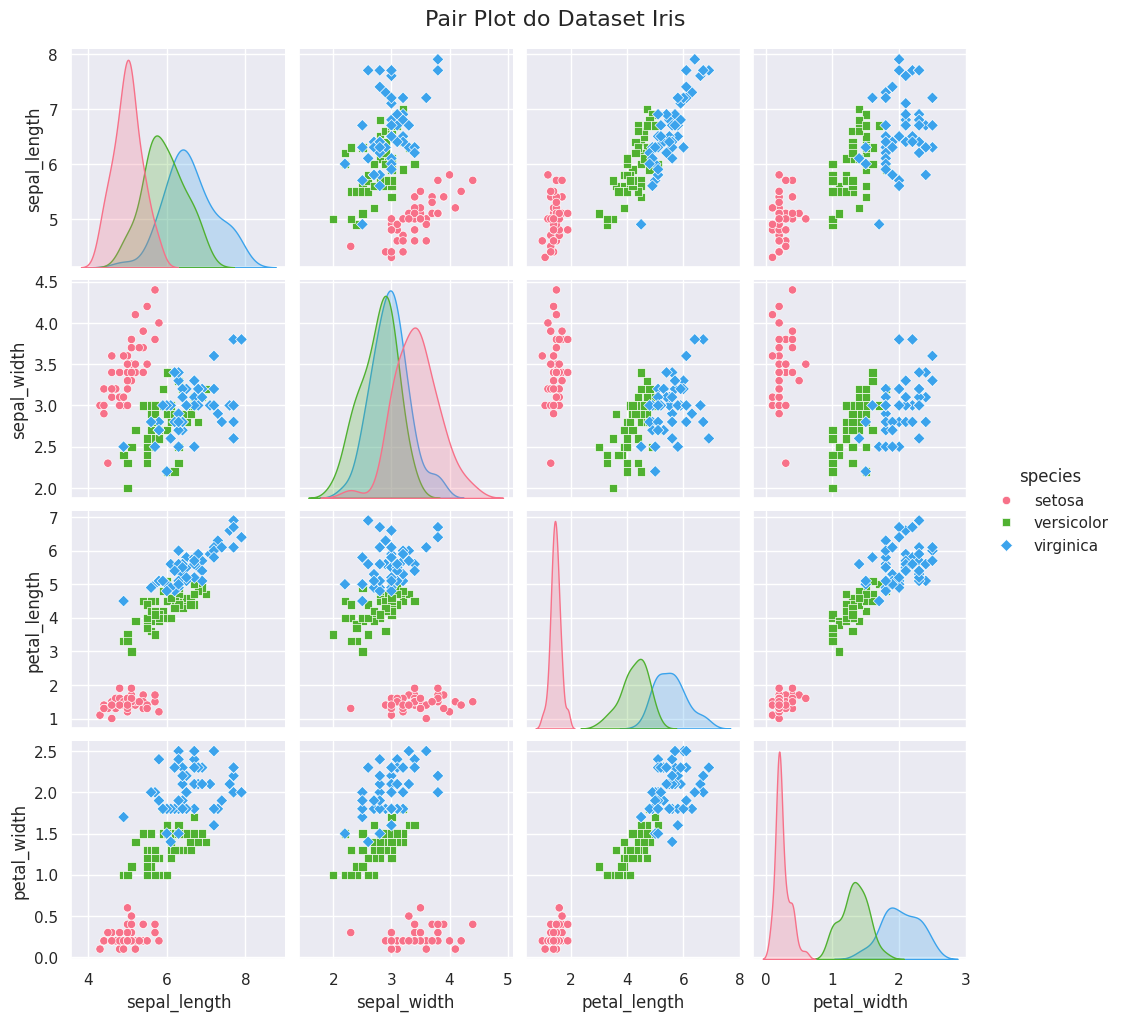

In [16]:
# --- Bloco: Pair Plot ---
# Reutilizar dataset 'iris'

# Pairplot simples
pair_plot = sns.pairplot(
    data=iris,
    hue="species",      # Colore os pontos/distribuições pela espécie
    palette="husl",
    markers=["o", "s", "D"],
    diag_kind="kde"     # O que plotar na diagonal ('hist' ou 'kde')
    # corner=True      # Plota apenas o triângulo inferior da matriz (evita redundância)
    # kind='reg'       # Usaria regplot em vez de scatter nos painéis fora da diagonal
)
pair_plot.fig.suptitle('Pair Plot do Dataset Iris', y=1.02, fontsize=16)
plt.show()

# Esperado: Uma grade de gráficos. A diagonal mostra a distribuição (KDE) de cada variável
#           (comprimento/largura da sépala/pétala), colorida por espécie. Os painéis fora da
#           diagonal mostram scatter plots da relação entre cada par de variáveis, também
#           coloridos por espécie. Ajuda a ver quais variáveis separam melhor as espécies.
# --- Fim Bloco: Pair Plot ---

**6.2 `jointplot()`**

Plota a relação bivariada entre duas variáveis (scatter, kde, hist, reg) e também as distribuições univariadas de cada uma nas margens.

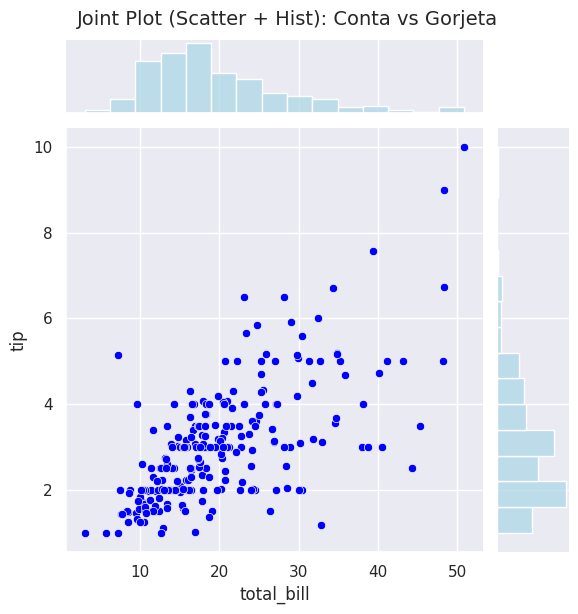

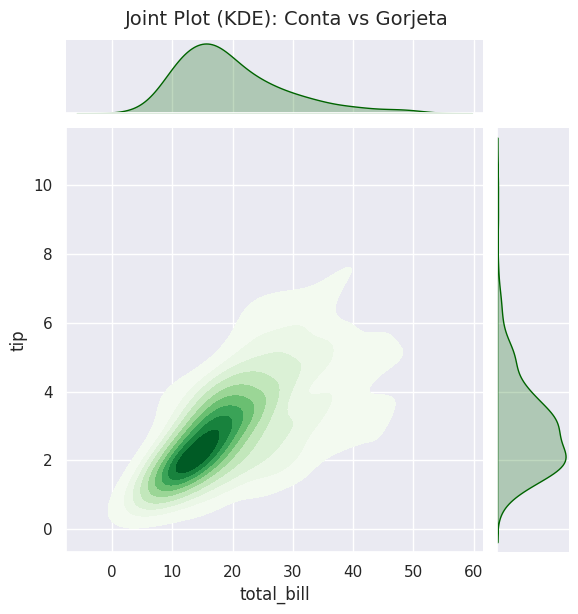

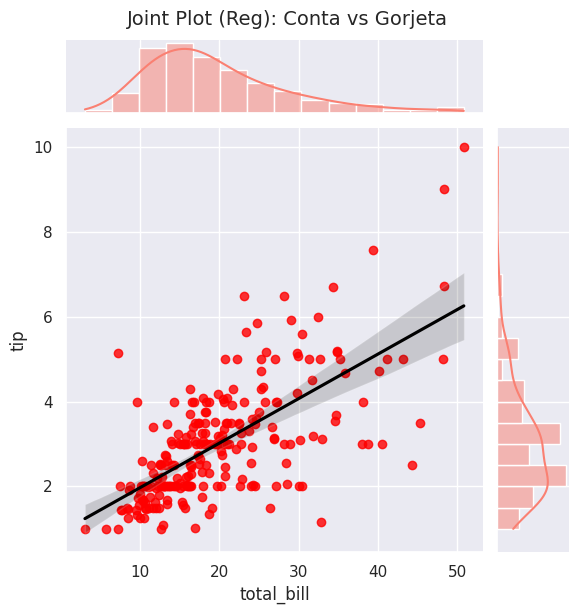

In [17]:
# --- Bloco: Joint Plot ---
# Reutilizar dataset 'tips'

# 1. Jointplot com scatter (padrão) e histogramas nas margens
joint_scatter = sns.jointplot(
    data=tips, x="total_bill", y="tip",
    color='blue',
    marginal_kws={'bins': 15, 'color': 'lightblue'} # Argumentos para os plots marginais (hist)
)
joint_scatter.fig.suptitle('Joint Plot (Scatter + Hist): Conta vs Gorjeta', y=1.02, fontsize=14)
plt.show()

# 2. Jointplot com KDE bivariado e KDEs univariados nas margens
joint_kde = sns.jointplot(
    data=tips, x="total_bill", y="tip",
    kind="kde",         # Especifica KDE para o plot central e marginal
    fill=True,
    cmap="Greens",
    marginal_kws={'fill': True, 'color': 'darkgreen'}
)
joint_kde.fig.suptitle('Joint Plot (KDE): Conta vs Gorjeta', y=1.02, fontsize=14)
plt.show()

# 3. Jointplot com Regressão
joint_reg = sns.jointplot(
    data=tips, x="total_bill", y="tip",
    kind="reg",         # Especifica Regressão
    color='red',
    line_kws={'color': 'black'},
    marginal_kws={'kde': True, 'color': 'salmon'} # KDEs nas margens
)
joint_reg.fig.suptitle('Joint Plot (Reg): Conta vs Gorjeta', y=1.02, fontsize=14)
plt.show()


# Esperado:
# 1. Um gráfico central mostrando o scatter plot conta vs gorjeta, com histogramas da conta (acima) e da gorjeta (à direita).
# 2. Um gráfico central mostrando contornos KDE 2D, com KDEs 1D nas margens.
# 3. Um gráfico central mostrando scatter plot com linha de regressão, com KDEs nas margens.
# --- Fim Bloco: Joint Plot ---

**6.3 `FacetGrid` e `PairGrid` (Mais Controle)**

* `FacetGrid`: Permite criar uma grade baseada em variáveis categóricas (`row`, `col`, `hue`) e então mapear *qualquer* função de plotagem (Seaborn ou Matplotlib) para cada faceta.
* `PairGrid`: Similar ao `pairplot`, mas permite mapear *diferentes* funções de plotagem para a diagonal, painéis superiores e inferiores da matriz par-a-par.

*(Estes são mais avançados e oferecem controle máximo sobre grades customizadas)*

---

### Seção 7: Customização

Como ajustar a aparência dos gráficos Seaborn.

**7.1 Temas e Contextos**

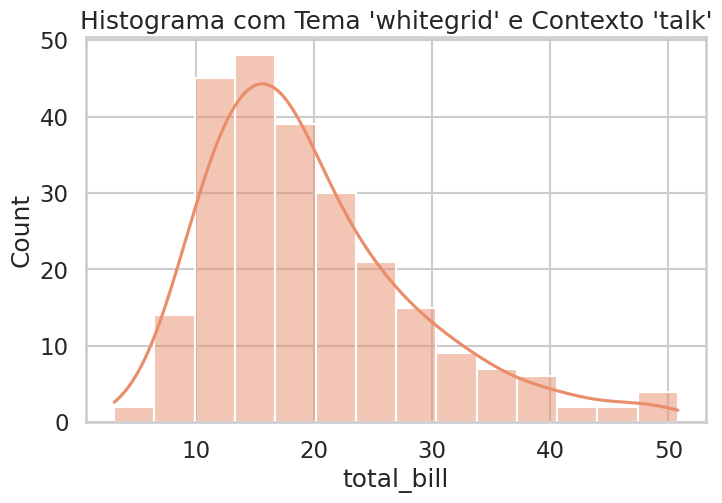

In [18]:
# --- Bloco: Temas e Contextos ---

# Listar estilos e contextos disponíveis
# print(plt.style.available) # Inclui estilos do Seaborn
# print(['paper', 'notebook', 'talk', 'poster'])

# Exemplo: Mudar tema e contexto
sns.set_theme(style="whitegrid", palette="flare") # Tema com grade branca, paleta 'flare'
sns.set_context("talk") # Ajusta tamanhos para uma apresentação ('talk')

plt.figure(figsize=(8, 5))
sns.histplot(data=tips, x="total_bill", kde=True)
plt.title("Histograma com Tema 'whitegrid' e Contexto 'talk'")
plt.show()

# Restaurar padrão (opcional)
sns.set_theme() # Volta ao tema padrão do Seaborn
sns.set_context("notebook") # Volta ao contexto padrão

# --- Fim Bloco: Temas e Contextos ---

**7.2 Paletas de Cores**

O argumento `palette` está disponível em muitas funções. Seaborn oferece muitas paletas embutidas e ferramentas para criar as suas.

<ipython-input-19-d9cc92129bf2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tips, x="day", y="tip", palette="coolwarm")


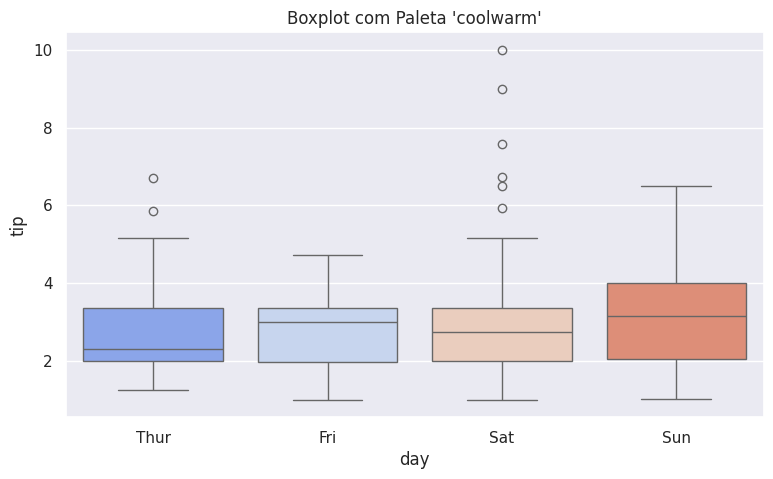

<ipython-input-19-d9cc92129bf2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=tips, x="day", y="tip", palette=custom_palette)


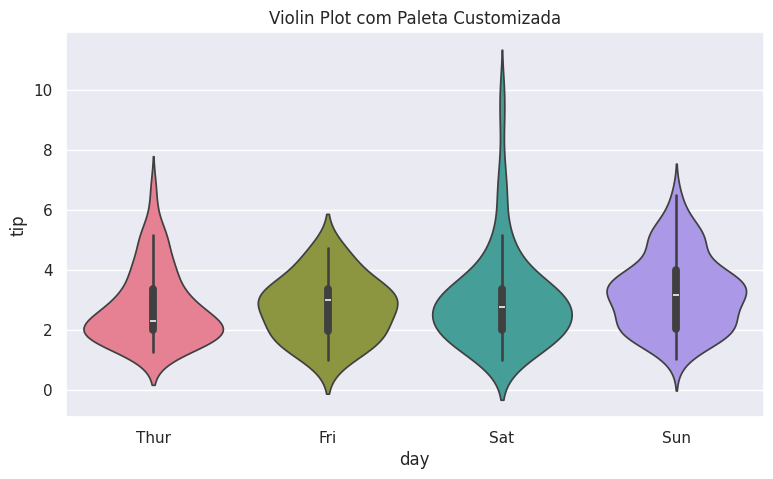

In [19]:
# --- Bloco: Paletas de Cores ---

# Usando paleta nomeada
plt.figure(figsize=(9, 5))
sns.boxplot(data=tips, x="day", y="tip", palette="coolwarm")
plt.title("Boxplot com Paleta 'coolwarm'")
plt.show()

# Criando uma paleta customizada
custom_palette = sns.color_palette("husl", 4) # 4 cores da paleta HUSL
# Ou cores específicas: custom_palette = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']
plt.figure(figsize=(9, 5))
sns.violinplot(data=tips, x="day", y="tip", palette=custom_palette)
# sns.palplot(custom_palette) # Visualiza a paleta
plt.title("Violin Plot com Paleta Customizada")
plt.show()

# --- Fim Bloco: Paletas de Cores ---

**7.3 Usando Métodos do Matplotlib**

Funções Axes-level retornam o `Axes` do Matplotlib. Funções Figure-level (como `relplot`, `displot`, etc.) retornam um objeto `FacetGrid`, `PairGrid` ou `JointGrid`, que *contém* os `Axes` (acessíveis via `.ax`, `.axes`, etc.) e também métodos próprios para ajustes.

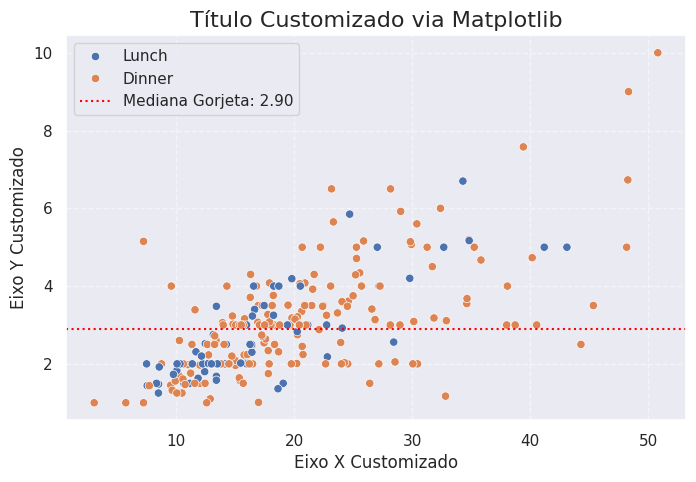

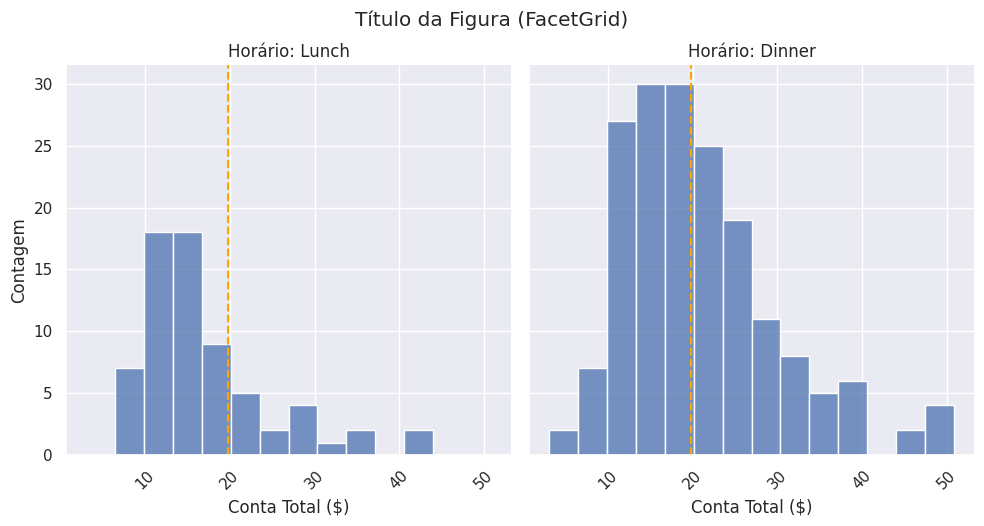

In [20]:
# --- Bloco: Customização Matplotlib ---

# 1. Customizando um plot Axes-level
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

# Usar métodos do Matplotlib no 'ax' retornado
ax.set_title("Título Customizado via Matplotlib", fontsize=16)
ax.set_xlabel("Eixo X Customizado", fontsize=12)
ax.set_ylabel("Eixo Y Customizado", fontsize=12)
ax.legend(title="Legenda Customizada", loc='upper right', fontsize=10)
ax.grid(True, linestyle='--', alpha=0.5) # Adicionar grade customizada
ax.axhline(tips['tip'].median(), color='red', linestyle=':', label=f"Mediana Gorjeta: {tips['tip'].median():.2f}")
ax.legend() # Chamar de novo para incluir a linha
plt.show()

# 2. Customizando um plot Figure-level (FacetGrid)
g = sns.displot(data=tips, x="total_bill", col="time", kind="hist")

# Usar métodos do objeto FacetGrid
g.fig.suptitle("Título da Figura (FacetGrid)", y=1.03)
g.set_axis_labels("Conta Total ($)", "Contagem")
g.set_titles("Horário: {col_name}") # Template para títulos dos subplots

# Acessar Axes individuais se necessário (g.axes é um array NumPy)
for ax_sub in g.axes.flat:
    ax_sub.tick_params(axis='x', labelrotation=45) # Girar rótulos X em cada subplot
    ax_sub.axvline(tips['total_bill'].mean(), color='orange', linestyle='--')

plt.show()


# Esperado:
# 1. Um scatter plot com título, rótulos, legenda e grade customizados usando métodos Matplotlib. Linha mediana adicionada.
# 2. Um displot (histograma facetado) com título geral, rótulos de eixo e títulos de subplot ajustados via métodos do FacetGrid. Rótulos X girados e linha média adicionada em cada subplot via loop nos Axes.
# --- Fim Bloco: Customização Matplotlib ---

---

### Seção 8: Seaborn vs Matplotlib - Quando Usar Qual?

* **Use Seaborn quando:**
    * Seu foco principal é a visualização estatística (distribuições, relações, comparações categóricas, regressões).
    * Você quer gráficos visualmente atraentes com pouco esforço de customização (bons padrões).
    * Você está trabalhando principalmente com DataFrames do Pandas.
    * Você precisa criar rapidamente grades complexas de gráficos baseadas em subconjuntos de dados (faceting).
* **Use Matplotlib (puro ou para customizar Seaborn) quando:**
    * Você precisa de controle total e granular sobre cada elemento do gráfico.
    * Você está criando tipos de gráficos não estatísticos ou altamente especializados (gráficos de engenharia, financeiros específicos, etc.).
    * Você precisa de performance máxima para um número muito grande de elementos gráficos (embora Seaborn seja geralmente eficiente).
    * Você está integrando gráficos em aplicações GUI (embora Seaborn possa ser usado aqui também via Matplotlib).

Eles trabalham **juntos**! É comum usar Seaborn para o plot principal e depois Matplotlib para ajustes finos.

---

### Seção 9: Conclusão

Seaborn é uma ferramenta poderosa e elegante no ecossistema de visualização de dados Python. Ela simplifica drasticamente a criação de gráficos estatísticos comuns e visualmente agradáveis, permitindo que você se concentre mais na exploração e comunicação dos insights dos seus dados. Sua forte integração com Pandas e a capacidade de criar visualizações complexas (como faceting) com pouco código a tornam indispensável para análise de dados moderna.

**Próximos Passos:**
* Explore a [Galeria Oficial do Seaborn](https://seaborn.pydata.org/examples/index.html) - é a melhor fonte de exemplos e inspiração!
* Experimente diferentes `styles`, `palettes` e `contexts`.
* Pratique usando os diferentes `kinds` nas funções Figure-level (`relplot`, `displot`, `catplot`).
* Combine Seaborn com customizações do Matplotlib para obter exatamente o gráfico que você precisa.

Espero que este guia detalhado seja um ótimo ponto de partida para você dominar o Seaborn!

<div class="md-recitation">
  Sources
  <ol>
  <li><a href="https://github.com/DjalmaANeto/Inteligencia_computacional">https://github.com/DjalmaANeto/Inteligencia_computacional</a></li>
  <li><a href="https://hub.asimov.academy/tutorial/criando-graficos-de-distribuicao-com-seaborn-em-python/">https://hub.asimov.academy/tutorial/criando-graficos-de-distribuicao-com-seaborn-em-python/</a></li>
  </ol>
</div>